# Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('Loan_Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


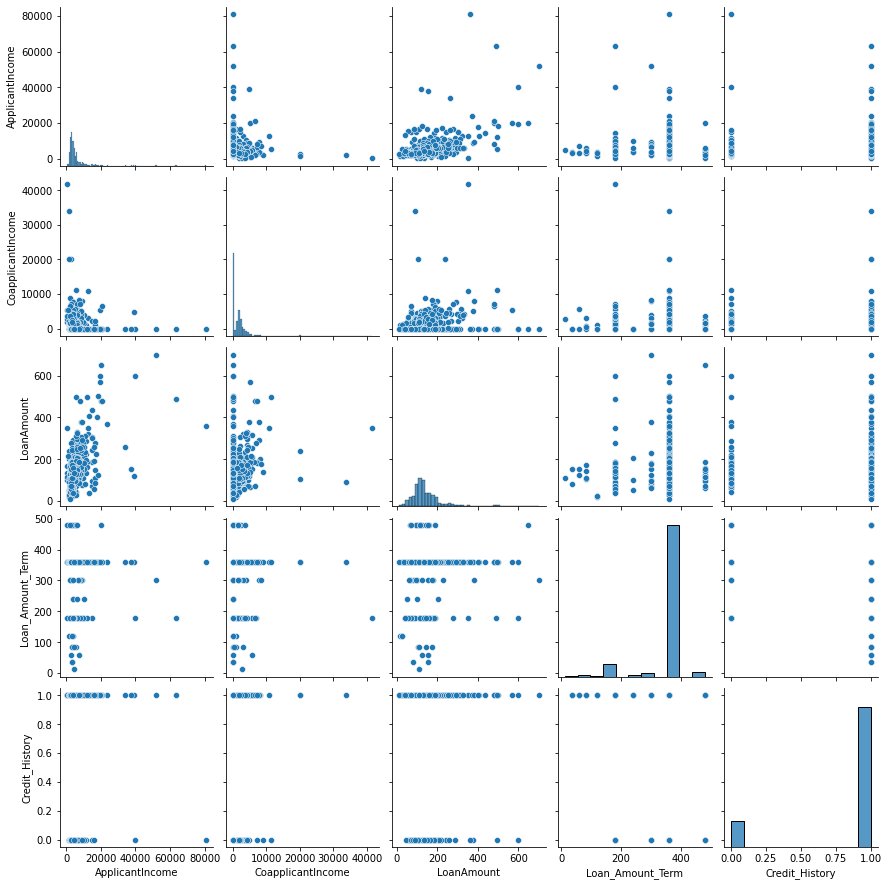

In [5]:
sns.pairplot(df)

# Preprocessing the data

In [6]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# # fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
# fill the missing values for categorical terms - mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA - Exploratory Data Analysis

Categorical attributes visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

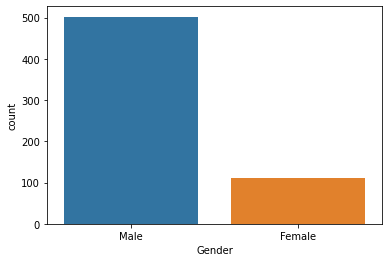

In [10]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

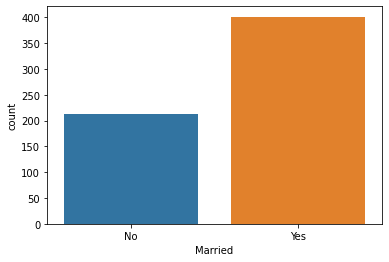

In [11]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

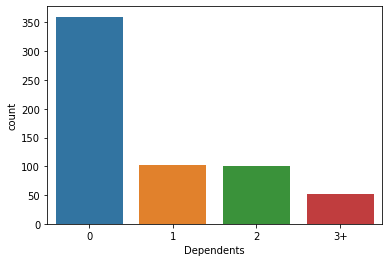

In [12]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

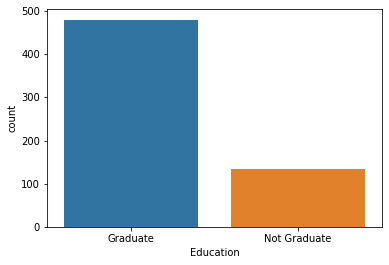

In [13]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

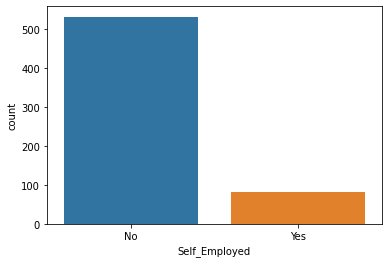

In [14]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

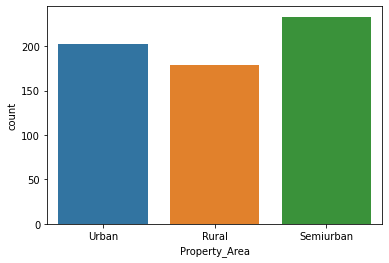

In [15]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

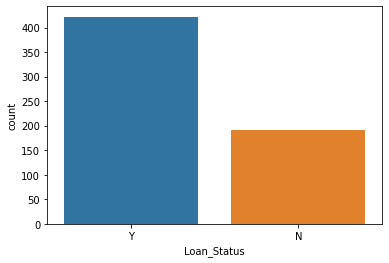

In [16]:
sns.countplot(df['Loan_Status'])

Numerical attributes visualization

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

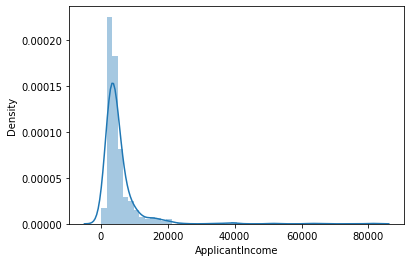

In [17]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

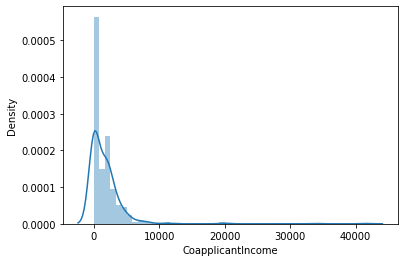

In [18]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

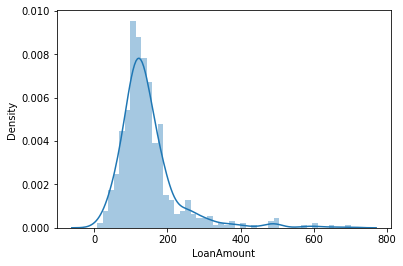

In [19]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

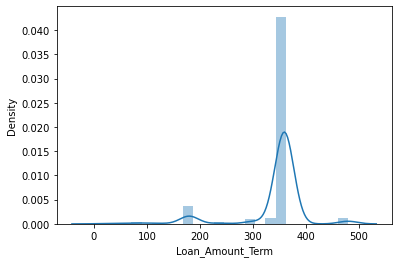

In [20]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

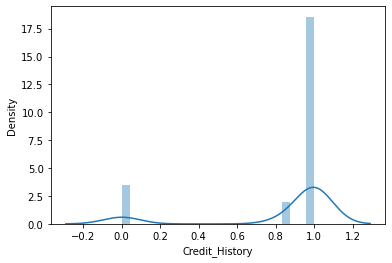

In [21]:
sns.distplot(df['Credit_History'])

# Creation of New Attributes





In [22]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Data Transformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

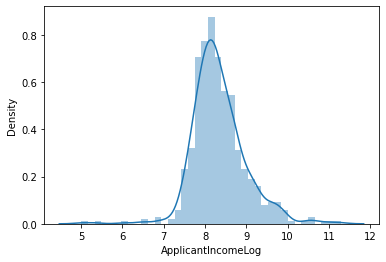

In [23]:
# apply Log Tranformation to the attribute 
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

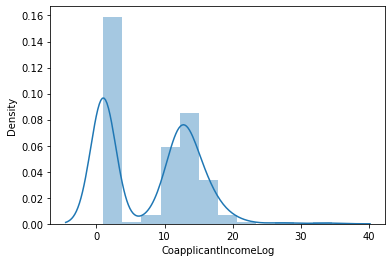

In [24]:
df['CoapplicantIncomeLog'] = np.cbrt(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

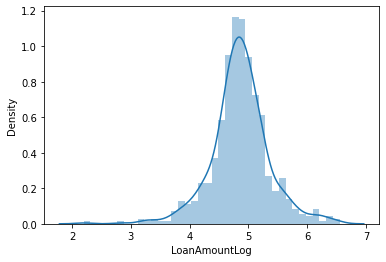

In [25]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

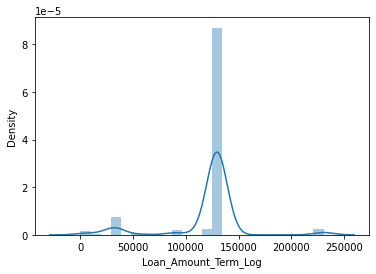

In [26]:
df['Loan_Amount_Term_Log'] = np.square(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

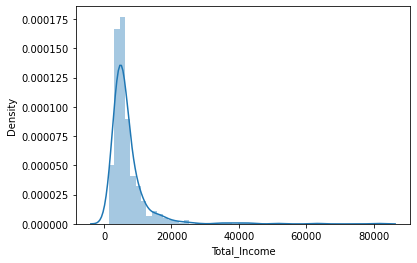

In [27]:
sns.distplot(df['Total_Income'])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

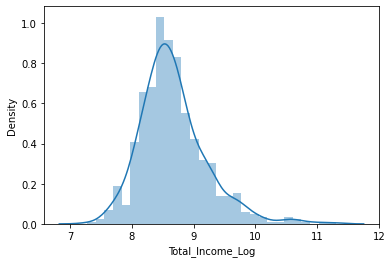

In [28]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

# Coorelation Matrix

<AxesSubplot:>

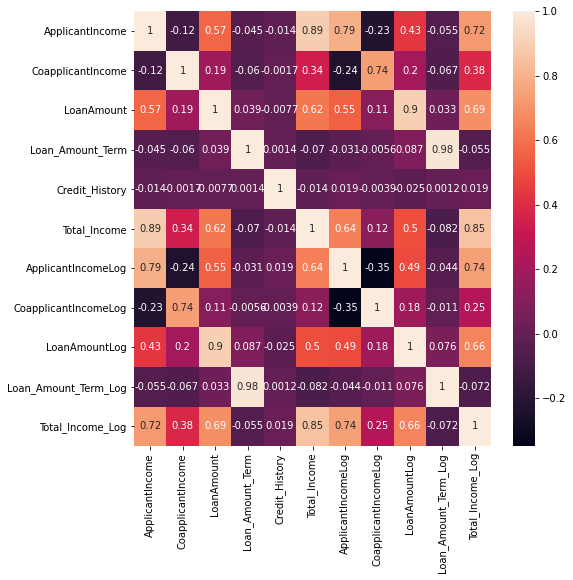

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,1.000000,4.986426,129600.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,11.469991,4.852030,129600.0,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,1.000000,4.189655,129600.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,13.311980,4.787492,129600.0,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,1.000000,4.948760,129600.0,8.699681


In [31]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,1.000000,4.986426,129600.0,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,11.469991,4.852030,129600.0,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,1.000000,4.189655,129600.0,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,13.311980,4.787492,129600.0,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,1.000000,4.948760,129600.0,8.699681


# Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

In [33]:
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,1.000000,4.986426,129600.0,8.674197
1,1,1,1,0,0,1.0,0,0,8.430109,11.469991,4.852030,129600.0,8.714732
2,1,1,0,0,1,1.0,2,1,8.006368,1.000000,4.189655,129600.0,8.006701
3,1,1,0,1,0,1.0,2,1,7.856707,13.311980,4.787492,129600.0,8.505525
4,1,0,0,0,0,1.0,2,1,8.699515,1.000000,4.948760,129600.0,8.699681


# Train-Test-Split

In [35]:
x = df.drop(columns=['Loan_Status'], axis=1).values
y = df['Loan_Status'].values

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=1)

# Model Training

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [38]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)
print(f'Accuracy :- {accuracy_score(ytest,ypred)}')
print(f'cvs :- {np.mean(cross_val_score(logreg,x,y, cv=2))}')

Accuracy :- 0.6829268292682927
cvs :- 0.6872964169381107


In [39]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(f'Accuracy :- {accuracy_score(ytest,ypred)}')
print(f'cvs :- {np.mean(cross_val_score(dt,x,y, cv=2))}')

Accuracy :- 0.7317073170731707
cvs :- 0.7247557003257329


In [54]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)
print(f'Accuracy :- {accuracy_score(ytest,ypred)}')
print(f'cvs :- {np.mean(cross_val_score(rfc,x,y, cv=2))}')

Accuracy :- 0.7804878048780488
cvs :- 0.7882736156351792


# Hyperparameter Tuning

In [55]:
para = {'n_estimators' : [0.1,1,10,100,1000],
        'max_features' : [1,0.1,0.01,0.001,0.0001],
        'criterion' : ['gini', 'entropy'],
        'max_depth' : [4,5,6,7,8]}

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid = GridSearchCV(RandomForestClassifier(), param_grid=para, refit=True, verbose=3, n_jobs=-1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [1, 0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': [0.1, 1, 10, 100, 1000]},
             verbose=3)

In [58]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 0.001,
 'n_estimators': 100}

In [59]:
gpred = grid.predict(xtest)
print(accuracy_score(ytest,ypred))

0.7804878048780488


# Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(f'Confusion_Matrix :- \n {confusion_matrix(ytest,ypred)}')

Confusion_Matrix :- 
 [[18 21]
 [ 6 78]]


<AxesSubplot:>

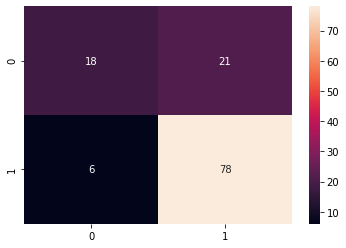

In [61]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)

In [63]:
# model save
import pickle
file = open('model.pkl', 'wb')
pickle.dump(model, file)